# WeatherPy

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print('Beginning Data Retrieval')
print('-----------------------------')
# Get weather data

#Set up lists to hold reponse info

record_number = 1
set_number = 1
city_data = []
for i, city in enumerate(cities):
    if (i %50 == 0 and i >= 50 ):
        set_number +=1 
        record_number =0
    print(f'Processing Record {record_number} of Set {set_number} | {city}' )
    record_number +=1
    try:
        weather_response = requests.get(query_url + city).json()

        cloudiness = weather_response['clouds']['all']
        country = weather_response['sys']['country']
        date = weather_response['dt']
        humidity = weather_response['main']['humidity']
        lat = weather_response['coord']['lat']
        lng = weather_response['coord']['lon']
        max_tem = weather_response['main']['temp_max']
        wind_speed = weather_response['wind']['speed']
        city_data.append({ "City": city,
                           "Cloudiness": cloudiness,
                            "Country": country,
                            "Date": date,
                            "Humidity": humidity,
                            "Lat": lat,
                            "Lng":lng,
                            "Max Temp": max_tem,
                            "Wind Speed": wind_speed})
    except:
        print('city not found. Skipping city')
        pass
# Inform that Data Retrieval was Completed
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | amderma
city not found. Skipping city
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | aksarka
Processing Record 10 of Set 1 | belushya guba
city not found. Skipping city
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | illoqqortoormiut
city not found. Skipping city
Processing Record 13 of Set 1 | esperance
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | sloboda
Processing Record 17 of Set 1 | taolanaro
city not found. Skipping city
Processing Record 18 of Set 1 | saint anthony
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | east 

Processing Record 37 of Set 4 | san felipe
Processing Record 38 of Set 4 | nemuro
Processing Record 39 of Set 4 | saskylakh
Processing Record 40 of Set 4 | rebrikha
Processing Record 41 of Set 4 | tricase
Processing Record 42 of Set 4 | rijeka
Processing Record 43 of Set 4 | kasongo-lunda
Processing Record 44 of Set 4 | barrow
Processing Record 45 of Set 4 | cacoal
Processing Record 46 of Set 4 | avarua
Processing Record 47 of Set 4 | ordu
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | lavrentiya
Processing Record 0 of Set 5 | stornoway
Processing Record 1 of Set 5 | rantauprapat
Processing Record 2 of Set 5 | nyurba
Processing Record 3 of Set 5 | stephenville
Processing Record 4 of Set 5 | cidreira
Processing Record 5 of Set 5 | pailon
Processing Record 6 of Set 5 | dubrovnik
Processing Record 7 of Set 5 | sentyabrskiy
city not found. Skipping city
Processing Record 8 of Set 5 | changji
Processing Record 9 of Set 5 | gidam
Processing Record 10 of Set 5 | so

Processing Record 26 of Set 8 | sisian
Processing Record 27 of Set 8 | kulhudhuffushi
Processing Record 28 of Set 8 | cadillac
Processing Record 29 of Set 8 | thaba nchu
Processing Record 30 of Set 8 | sinop
Processing Record 31 of Set 8 | reconquista
Processing Record 32 of Set 8 | havre-saint-pierre
Processing Record 33 of Set 8 | vilcun
Processing Record 34 of Set 8 | nizwa
Processing Record 35 of Set 8 | shimoda
Processing Record 36 of Set 8 | port-cartier
Processing Record 37 of Set 8 | arvika
Processing Record 38 of Set 8 | port-de-paix
city not found. Skipping city
Processing Record 39 of Set 8 | ilulissat
Processing Record 40 of Set 8 | gornozavodsk
Processing Record 41 of Set 8 | voloshka
Processing Record 42 of Set 8 | erzurum
Processing Record 43 of Set 8 | bontang
Processing Record 44 of Set 8 | nabire
Processing Record 45 of Set 8 | malayal
Processing Record 46 of Set 8 | ust-kuyga
Processing Record 47 of Set 8 | gaoual
Processing Record 48 of Set 8 | saint george
Processi

Processing Record 13 of Set 12 | los alamos
Processing Record 14 of Set 12 | turan
Processing Record 15 of Set 12 | calvinia
Processing Record 16 of Set 12 | moron
Processing Record 17 of Set 12 | kangaatsiaq
Processing Record 18 of Set 12 | sanming
Processing Record 19 of Set 12 | bani
Processing Record 20 of Set 12 | santiago del estero
Processing Record 21 of Set 12 | igrim
Processing Record 22 of Set 12 | dourbali
Processing Record 23 of Set 12 | keti bandar
Processing Record 24 of Set 12 | karkaralinsk
city not found. Skipping city
Processing Record 25 of Set 12 | tabulbah
city not found. Skipping city
Processing Record 26 of Set 12 | lata
Processing Record 27 of Set 12 | casma
Processing Record 28 of Set 12 | sao sebastiao do paraiso
Processing Record 29 of Set 12 | coxim
Processing Record 30 of Set 12 | myrtle beach
Processing Record 31 of Set 12 | cassilandia
Processing Record 32 of Set 12 | khoy
Processing Record 33 of Set 12 | douentza
Processing Record 34 of Set 12 | sapa
Pr

In [18]:
# Create a data frame 
weather_df = pd.DataFrame(city_data)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather_df.to_csv("output/weather_cities.csv", encoding='utf-8', index=False)

In [20]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kruisfontein,100,ZA,1619368272,43,-34.0033,24.7314,72.09,3.65
1,hobart,75,AU,1619368272,67,-42.8794,147.3294,57.00,10.36
2,arraial do cabo,0,BR,1619368272,61,-22.9661,-42.0278,84.20,9.22
3,cape town,0,ZA,1619368272,82,-33.9258,18.4232,69.01,16.11
4,katsuura,75,JP,1619368273,54,35.1333,140.3000,57.20,17.27


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [42]:
new_coders = "output/weather_cities.csv"
delete_later = pd.read_csv(new_coders)
delete_later['City'].count()

560

In [43]:
#Verify if there are any cities with humidity>100%
humidity_cities = delete_later.loc[delete_later["Humidity"] <= 100, :]
humidity_cities['City'].count()

560

In [ ]:
#  Get the indices of cities that have humidity over 100%.

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

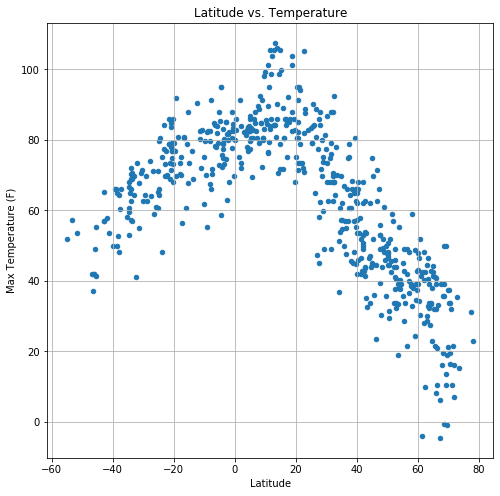

In [45]:
delete_later.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
              title="Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Show plot
plt.savefig("Images/LatvsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression